# Data Preprocessing Template

## Importing the libraries

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go


## Importing the dataset

In [51]:
conditions = {
    "calve": "1",
    "knorr": "2",
    "lipton": "3",
    "LİPTON": "3",
    "omo": "4",
    "rinso": "5",  
    "yumos": "6",
    "yumoş": "6",  
    "signal": "7",
    "SİGNAL": "7",
    "white": "7",  
    "şampuan": "8",
    "dove": "9",
    "elidor": "10",
    "ELİDOR": "10",
    "clear": "11",
    "domestos": "12",
    "vim": "13",
    "cif": "14",
    "CİF": "14",
    "yüzey": "15",
    "rexona": "16",
    "axe": "17",
    "lux": "18",  
    "pure": "19",  
    "VASELİNE": "20" 
}

def value_to_condition(value):
    for k, v in conditions.items():
        if str(value) == str(v):
            return k
    return None



In [52]:
dataset = pd.read_excel("vm_dataset.xlsx")

In [53]:
dataset["MARKA"] = dataset["MAMUL"].apply(value_to_condition)

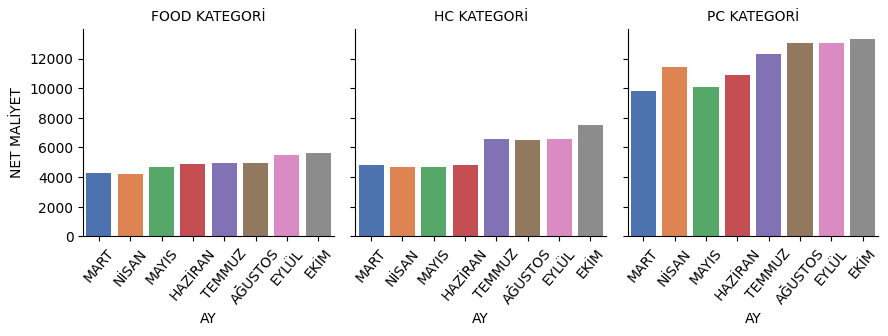

In [54]:
g = sns.FacetGrid(data=dataset , col="KATEGORİ")
g.map(sns.barplot, "AY", "NET MALİYET", order=dataset["AY"].unique(),
      palette="deep", errorbar=None, estimator=np.sum, orient="v", saturation=1).set_xticklabels(rotation=50).set_titles("{col_name} {col_var}")
# bu grafikte kategorilerin aylara göre net maliyetlerini görebiliriz.

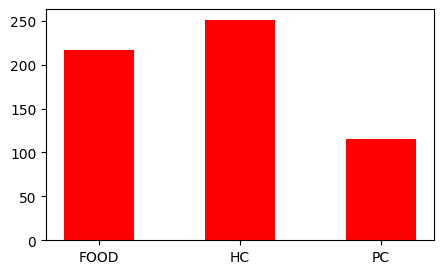

In [55]:
fig = plt.figure(figsize=(5,3))
plt.bar(dataset["KATEGORİ"], dataset["NET MALİYET"], color="red", width=0.5)
plt.show()
# bu grafikte kategorilerin net maliyetlerini görebiliriz.

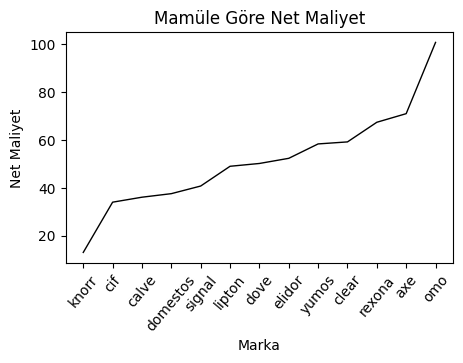

In [56]:
fig = plt.figure(figsize=(5,3))
# net maliyeti ortalamasına göre sırala
ort = dataset.groupby("MARKA")["NET MALİYET"].mean().sort_values(ascending=True)

# plt.bar(x=ort.index, height=ort.values, color="red", width=0.5) # type: ignore
plt.plot(ort.index, ort.values, color="black", linewidth=1, markersize=5)
plt.title("Mamüle Göre Net Maliyet")
plt.xticks(rotation=50)
plt.xlabel("Marka")
plt.ylabel("Net Maliyet")
plt.show()

# marka bazında net maliyet ortalaması sıralaması

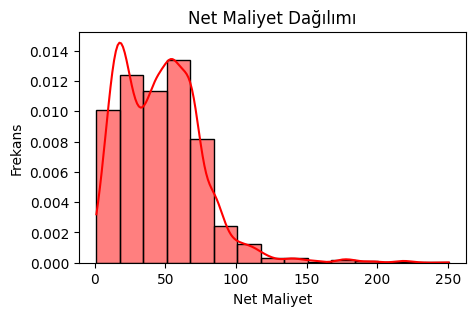

In [57]:
fig = plt.figure(figsize=(5,3))
sns.histplot(dataset["NET MALİYET"], color="red", bins=15, kde=True, stat="density")
plt.title("Net Maliyet Dağılımı")
plt.xlabel("Net Maliyet")
plt.ylabel("Frekans")
plt.show()
# net maliyet dağılımı grafiği

<AxesSubplot: xlabel='KATEGORİ', ylabel='NET MALİYET'>

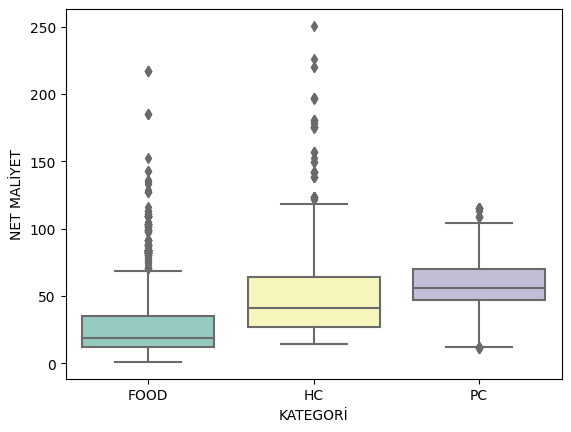

In [58]:
sns.boxplot(x=dataset["KATEGORİ"], y=dataset["NET MALİYET"], palette="Set3")
# boxplot ile kategorilerin net maliyetlerinin yüzdelik dilimlerini görebiliriz.

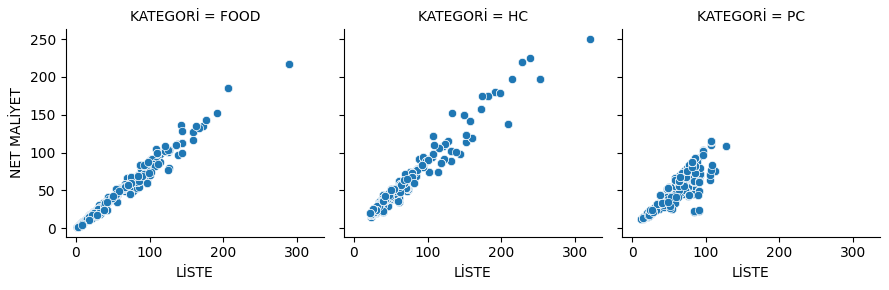

In [59]:
g = sns.FacetGrid(data=dataset , col="KATEGORİ")
g.map(sns.scatterplot, "LİSTE", "NET MALİYET")

# scatterplot ile kategorilerin liste ve net maliyetlerini görselleştirmesi.

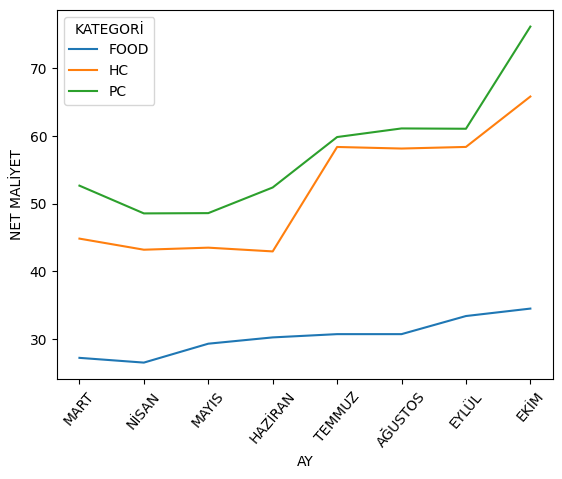

In [60]:
# lineplot 
sns.lineplot(x=dataset["AY"], y=dataset["NET MALİYET"], hue=dataset["KATEGORİ"], errorbar=None)
plt.xticks(rotation=50)
plt.show()

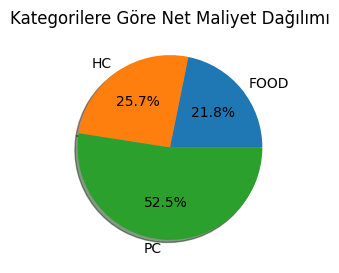

In [61]:
# pie chart
fig = plt.figure(figsize=(5,3))
plt.pie(dataset.groupby("KATEGORİ")["NET MALİYET"].sum(), labels=dataset["KATEGORİ"].unique(), autopct='%1.1f%%', shadow=True)
plt.title("Kategorilere Göre Net Maliyet Dağılımı")
plt.show()


## TAHMİN - GERÇEK VERİ SETİ

In [62]:
comparison_dataset = pd.read_excel("comparison_dataset.xlsx")
comparison_dataset.head() # Tahmin,	Gerçek

,Tahmin,Gerçek
0,51.833789,47.934958
1,38.026856,38.115900
2,35.784874,24.404345
3,47.845657,43.247331
4,21.043368,23.612815


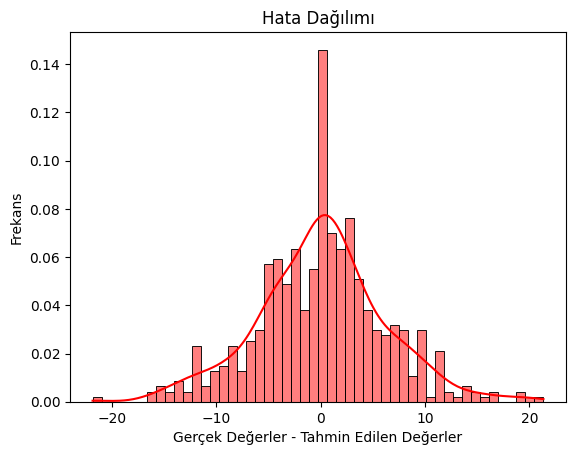

In [63]:
sns.histplot(comparison_dataset["Tahmin"] - comparison_dataset["Gerçek"], bins=50, kde=True, color='red', alpha=0.5, stat='density')
plt.xlabel('Gerçek Değerler - Tahmin Edilen Değerler')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı')
plt.show()
